<a href="https://colab.research.google.com/github/skylerputney/MachineLearning/blob/main/NN_DigitClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Tools

In [ ]:
import matplotlib.pyplot as plt  # Display graphs
import numpy as np  # Data management
import keras  # Neural network model
from keras.datasets import mnist  # Handwriting dataset
from keras.models import Sequential  # NN model as linear stack of layers
from keras.layers import Dense, Dropout  # Dense layer, Dropout to reduce overfitting
from sklearn.metrics import classification_report  # Test performance analysis
from sklearn.model_selection import train_test_split  # Test/Val dataset split

#Load MNIST Handwriting Dataset
1. Load and split the MNIST handwriting images dataset into two datasets (tuples): one containing training features and training target variables; and one containing testing features and testing target variables.

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Explore the Datasets
1.   Examine the shape of the training and testing datasets
2.   Ensure no missing/non-numeric values in datasets
3.   Examine/Check pixel range of features (0-255)
4.   Ensure no duplicate images in features datasets



In [ ]:
# Check shape of data samples
print(f"Training: Inputs Shape: {x_train.shape}, Outputs Shape: {y_train.shape}")
print(f"Testing: Inputs Shape: {x_test.shape}, Outputs Shape: {y_test.shape}")

# Check for missing values
print(f"Missing Values: {np.isnan(x_train).any() or np.isnan(y_train).any() or np.isnan(x_test).any() or np.isnan(y_test).any()}")

# Check pixel range value
all_images = np.concatenate((x_train, x_test), axis=0)
print(f"Min pixel val: {np.min(all_images)}, Max pixel val: {np.max(all_images)}")

# Check for duplicate images
unique_images = np.unique(all_images.reshape(all_images.shape[0], -1), axis=0)
print("Duplicates:", all_images.shape[0] - unique_images.shape[0])

Training: Inputs Shape: (60000, 28, 28), Outputs Shape: (60000,)
Testing: Inputs Shape: (10000, 28, 28), Outputs Shape: (10000,)
Missing Values: False
Min pixel val: 0, Max pixel val: 255
Duplicates: 0


There are 60,000 data samples for model training and 10,000 data samples for model testing. Each input (feature, x) consists of a 28x28 array of grayscale values ranging from 0-255. Each output (target variable, y) is a label (number) representing the digit depicted in the corresponding image.

# Transform Data
1. Flatten input features from 28x28 2D arrays into 784-length 1D vectors for input into dense layers
2. Normalize pixel values to [0, 1] range instead of [0, 255] range for more stable and efficient gradient descent
3. Convert target labels from integers (sparse labels) to one-hot encoded vectors for use in categorical classification

In [ ]:
# Flatten Features into vector
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

# Normalize Features
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert Labels to one-hot encoding (want confidence in just 1 answer)
num_categories = 10  # Number of categories to choose from == Number of digits
y_train = keras.utils.to_categorical(y_train, num_categories)
y_test = keras.utils.to_categorical(y_test, num_categories)


#Split Training Dataset into Training and Validation Datasets
1. Allot 10% of the training dataset to a validation dataset
2. Ensure valid # of instances and instance shape for training and validation features.

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)
print(x_train.shape)
print(x_val.shape)

(54000, 784)
(6000, 784)


Now, we have 54,000 training instances and 6,000 validation instances, each with input features consisting of a Vector of length 784 with values representing a normalized grayscale value.

#Display of Training Data
1. Display the first four training instances as plots showing the input features image along with its corresponding one-hot encoded vector label, with the sparse label representation shown in parentheses.

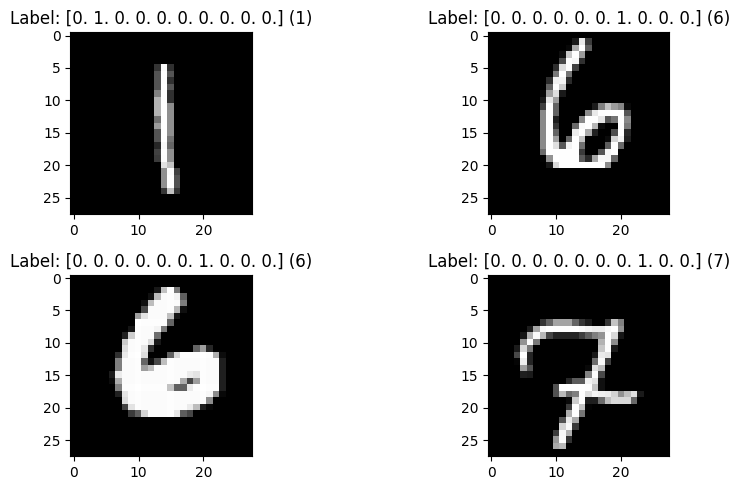

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
  ax.imshow(x_train[i].reshape(28, 28), cmap='gray')
  ax.set_title(f"Label: {y_train[i]} ({np.argmax(y_train[i], axis=0)})")
plt.tight_layout()
plt.show()

#Define Neural Network Model
1. Instantiate sequential neural network model (linear stack of layers)
2. Add a dense input layer with input shape of (784,) to handle flattened image data
3. Add a hidden dense layer
4. Add a dropout layer with a rate of 0.25 to reduce overfitting by randomly deactivating nodes during training
5. Add a dense ouput layer with 10 nodes and softmax activation to produce a probability distribution over the 10 digit classes (categories, 0-9).

In [ ]:
model = Sequential()

# Input layer
model.add(Dense(units=256, input_shape=(784,), activation='relu'))

# Hidden layer
model.add(Dense(units=256, activation='relu'))

# Dropout layer for regularization and to prevent overfitting
model.add(Dropout(0.25))

# Output layer with softmax activation and 10 units, producing a probability distribution over the 10 digits
model.add(Dense(units=10, activation='softmax'))

#Compile Model with Appropriate Training Parameters
1. Compile the model with 'categorial_crossentropy' as loss, corresponding to the one-hot vector labels; 'adam' as the optimizer; and accuracy as the performance metric
2. Display model layers

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

#Train Model
1. Fit (train) the model on the training dataset and validate on the validation dataset over 20 epochs with a batch size of 512

In [ ]:
history = model.fit(x_train, y_train, batch_size=512, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.7471 - loss: 0.8618 - val_accuracy: 0.9448 - val_loss: 0.1870
Epoch 2/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9442 - loss: 0.1925 - val_accuracy: 0.9642 - val_loss: 0.1244
Epoch 3/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9629 - loss: 0.1249 - val_accuracy: 0.9727 - val_loss: 0.0956
Epoch 4/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9723 - loss: 0.0930 - val_accuracy: 0.9745 - val_loss: 0.0863
Epoch 5/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9797 - loss: 0.0713 - val_accuracy: 0.9768 - val_loss: 0.0731
Epoch 6/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9831 - loss: 0.0571 - val_accuracy: 0.9792 - val_loss: 0.0738
Epoch 7/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9859 - loss: 0.0495 - val_accuracy: 0.9802 - val_loss: 0.0682
Epoch 8/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.9878 - loss: 0.0398 - val_accu

#Examine Training Performance Statistics
1. Display accuracy and loss plots for model performance across epochs for training and validation datasets
2. Analyze performance statistics to identify any interesting trends/results

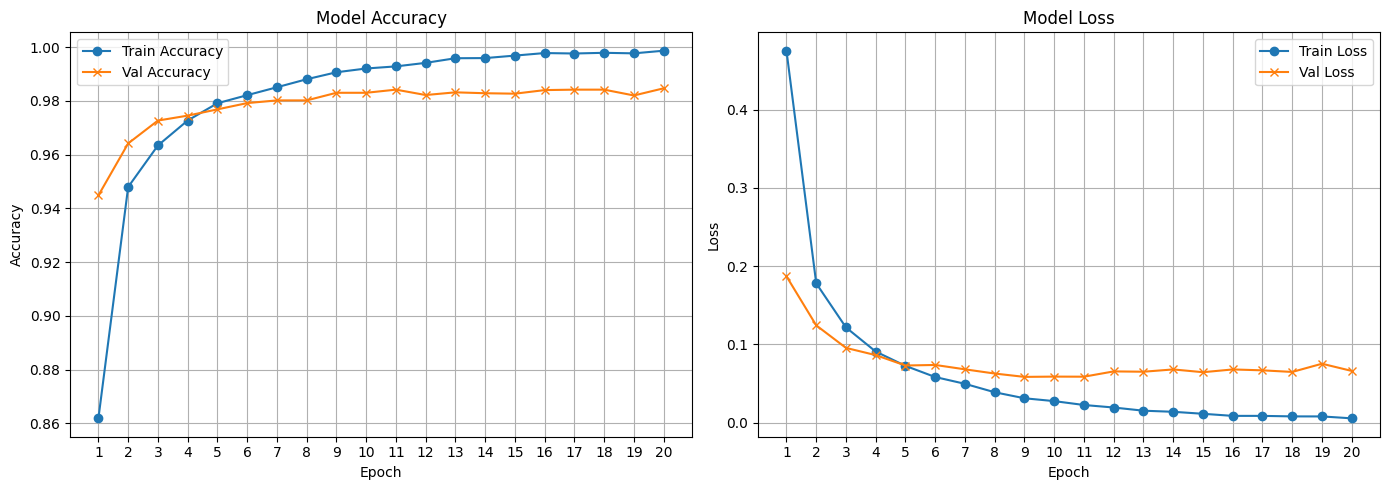

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot Accuracy
axes[0].plot(history.history['accuracy'], label='Train Accuracy', marker='o')
axes[0].plot(history.history['val_accuracy'], label='Val Accuracy', marker='x')
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True)
axes[0].set_xticks(range(len(history.history['accuracy'])))
axes[0].set_xticklabels(range(1, len(history.history['accuracy']) + 1))

# Plot Loss
axes[1].plot(history.history['loss'], label='Train Loss', marker='o')
axes[1].plot(history.history['val_loss'], label='Val Loss', marker='x')
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True)
axes[1].set_xticks(range(len(history.history['loss'])))
axes[1].set_xticklabels(range(1, len(history.history['loss']) + 1))

plt.tight_layout()
plt.show()


An examination of the model accuracy statistics shows that training accuracy increased sharply early on and then steadily, reaching 99.64% by epoch 13, suggesting that the model was training effectively. After this point, change in training accuracy was minimal with each additional epoch, with only slight increases and occasional dips, resulting in the final epoch (20) having a training accuracy of 99.88%.
Validation accuracy also rose quickly at first and then steadily, encountered a slight dip on epoch 12, after which it experienced minimal increases and decreases, effectively plateuing around 98.3%, indicating stabilization on general performance. The final epoch (20) had a validation accuracy of 98.47%, suggesting that the model will perform well on any input data.
However, the growing gap between training and validation accuracy, seen starting around epoch 9, indicates that the model began to overfit to the training data.

Similarly, an examination of the model loss statistics shows that both training and validation loss decreased sharply at the beginning, consistent with the seen improvements in performance. However, after around epoch 9, training loss continued to decline smoothly while validation loss plateaued and began to fluctuate slightly around a value of ~0.0625. This further supports the conclusion that overfitting started to occur around epoch 9.



#Run Trained Model on Test Dataset
1. Use the evaluate method to run the model on the test data and generate loss and accuracy statistics
2. Use the predict method to run the model on the test data and gather model output values as sparse labels

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)

y_pred = np.argmax(model.predict(x_test), axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9784 - loss: 0.0908
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


#Display Testing Performance Statistics
1. Print model accuracy and loss
2. Print classification report

In [ ]:
print(f"Accuracy: {accuracy}, Loss: {loss}\n")
print("Classification Report:")
print(classification_report(np.argmax(y_test, axis=1), y_pred))
#confusion_matrix(y_test_labels, y_pred)

Accuracy: 0.9811000227928162, Loss: 0.07528756558895111

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.98      0.99      0.98       958
           7       0.99      0.97      0.98      1028
           8       0.98      0.97      0.98       974
           9       0.97      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



#Conclusion
Overall, the model performed very well, achieving an accuracy of 98.11% on testing data with a loss of only 0.075. Based on this high accuracy and low loss, I would recommend the model for deployment in the "real world," as it will likely perform reliably on any handwritten digit data.

As mentioned during an examination of the testing statistics, however, it is likely that the model began overfitting to training data around testing epoch 9. This suggests that perhaps a decrease in the number of training epochs, early stopping based on increases in validation loss, or a tweaking of the network layers may result in even better generalized performance.